# Introduction

This notebook provides a step-by-step guide to conducting Organizational Network Analysis (ONA) using Python. ONA is a valuable tool for understanding the relationships and communication patterns within an organization, allowing leaders to optimize collaboration, streamline communication, and enhance organizational effectiveness.

**Contents:**
* Load Libraries: Import necessary Python libraries for data manipulation, network analysis, and visualization.

* Create Dummy Data: Generate synthetic data representing employees and their interactions within the organization. This includes creating lists of first names, last names, teams, and two tests with their scores, randomly combining names to create pairs of interacting employees, and assigning interaction statuses.

* Format Dummy Data: Filter the dummy data to include only interactions with a status of "TRUE," add overall profile scores for both ego and alter

* Ego and Alter: Preperation steps into creating an Ego network

* Visualising the network: Display the network

* Add additonal layers of insights into the network: Identify the employee with the highest centrality value, representing the individual with the most influence in the organization.

* Recomendation Analysis: Dig deeper into the analysis by applying a few moretransformations and calculations to make communication reccomendations

By following this notebook, users can gain valuable insights into the structure of their organization's social network and identify key players who drive communication and collaboration. These insights can inform strategic decisions related to leadership development, team dynamics, and organizational communication strategies.







# Preperation

## Load libraries


In [1]:
import igraph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import itertools
from statistics import mean

## Create dummy data

In [2]:
#Write sample data
firstnames = ["Maria", "Nushi", "Mohammed", "Jose", "Muhammad", "Mohamed", "Wei", "Mohammad", "Ahmed", "Yan", "Ali", "John", "David", "Li", "Abdul", "Ana", "Ying", "Michael", "Juan", "Anna", "Mary", "Jean", "Robert", "Daniel", "Luis", "Carlos", "James", "Antonio", "Joseph", "Hui", "Elena", "Francisco", "Hong", "Marie", "Min", "Lei", "Yu", "Ibrahim", "Peter", "Fatima", "Aleksandr", "Richard", "Xin", "Bin", "Paul", "Ping", "Lin", "Olga", "Sri", "Pedro", "William", "Rosa", "Thomas", "Jorge", "Yong", "Elizabeth", "Sergey", "Ram", "Patricia", "Hassan", "Anita", "Manuel", "Victor", "Sandra", "Ming", "Siti", "Miguel", "Emmanuel", "Samuel", "Ling", "Charles", "Sarah", "Mario", "Joao", "Tatyana", "Mark", "Rita", "Martin", "Svetlana", "Patrick", "Natalya", "Qing", "Ahmad", "Martha", "Andrey", "Sunita", "Andrea", "Christine", "Irina", "Laura", "Linda", "Marina", "Carmen", "Ghulam", "Vladimir", "Barbara", "Angela", "George", "Roberto", "Peng", "Ivan", "Alexander", "Ekaterina", "Qiang", "Yun", "Jesus", "Susan", "Sara", "Noor", "Mariam", "Dmitriy", "Eric", "Zahra", "Fatma", "Fernando", "Esther", "Jin", "Diana", "Mahmoud", "Chao", "Rong", "Santosh", "Nancy", "Musa", "Anh", "Omar", "Jennifer", "Gang", "Yue", "Claudia", "Maryam", "Gloria", "Ruth", "Teresa", "Sanjay", "Na", "Nur", "Kyaw", "Francis", "Amina", "Denis", "Stephen", "Sunil", "Gabriel", "Andrew", "Eduardo", "Abdullah", "Grace", "Anastasiya", "Mei", "Rafael", "Ricardo", "Christian", "Aleksey", "Steven", "Gita", "Frank", "Jianhua", "Mo", "Karen", "Masmaat", "Brian", "Christopher", "Xiaoyan", "Rajesh", "Mustafa", "Eva", "Bibi", "Monica", "Oscar", "Andre", "Catherine", "Kai", "Ramesh", "Liping", "Sonia", "Anthony", "Mina", "Manoj", "Ashok", "Rose", "Alberto", "Ning", "Rekha", "Chen", "Lan", "Aung", "Alex", "Suresh", "Anil", "Fatemeh", "Julio", "Zhen", "Simon", "Paulo", "Juana", "Irene", "Adam", "Kevin", "Lori"]

lastnames = ["Smith", "Ali", "Kim", "Khan", "Lee", "Tan", "Ahmed", "Lopez", "Awad", "Singh", "Perez", "Reyes", "Li", "Nkosi", "Soto", "Saleh", "Saidi", "Zhang", "Diaz", "Saad", "Kamwi", "Mbeki", "Finai", "Izaia", "Oubi", "Ashoo", "Sirmi", "Saeh", "Giam", "Voe", "Qoe", "Gihon,", "Shora", "Bhut", "Denil", "Rezo", "Cirss", "Mohid", "Zebu", "Vynek", "Zebul", "Haci", "Nelso", "Wuade", "Rodriguez", "Garcia", "Gonzalez", "Hassan", "Mohamed", "Castillo", "DeReygosa", "Macandie", "Yakobovitz", "Carolay", "Galvee", "Tydd,", "Tyreman", "Nawton", "OFallon", "Knobell", "Roisen", "Schwieso", "Keirl", "Vyel", "Kinnock", "Odempsey", "Wharmby", "Riddoch", "Lowres", "Venny", "Semens", "Leland", "Garratty", "OHearn", "Pilipyak", "Mityushin", "Wolledge", "Loughton", "Klausewitz", "Reymers", "Tucknutt", "Littleproud", "Huxster", "Mccrachen", "Jacquet-francillon", "ElArrasi", "Bs", "Klemt", "Mulliss", "Mackleden", "Moretonas", "Haoxiang", "Kokemohr", "Sterricker", "Minchenton", "Tuffrey", "Truder", "Harichane", "Pagden", "Mallows"]

teams = ["Product", "Marketing", "Data Science", "Psychology", "Content", "Finance", "Sales", "Customer Success"]

#Random generate a list of names from first names and last names
names = " ".join(random.choice(firstnames)+" "+random.choice(lastnames)+"," for _ in range(50))

#Turn that names list into an actual list {from a string}
names2 = names.split(",")
names3 = list(names2)

#Create an edge list that randomly ombines two people from the entire list
edge_list = list(itertools.combinations((names3), 2))
interactions = pd.DataFrame(edge_list, columns = ['person_a', 'person_b'])

#Randomly assign whether these two people interact or not
interactions['interaction_random'] = np.random.randint(0, 2, interactions.shape[0])

#Create dataframe of individuals and teams based on names list and teams
res = {names3[i]: random.choice(teams) for i in range(len(names3))}
names_teams = pd.DataFrame.from_dict(res, orient='index', columns=['Team'])
names_teams['Names'] = names_teams.index

#Create test scores
profile_scores = pd.DataFrame(names3, columns = ['ego'])
testB_scores_array = np.random.default_rng().uniform(low=-2.5,high=2.5, size=[300,4])
testA_scores_scores_array = np.random.default_rng().uniform(low=-4,high=4, size=[300,6])
testB_scores = pd.DataFrame(testB_scores_array, columns = ['question_B1', 'question_B2', 'question_B3', 'question_B4'])
testA_scores = pd.DataFrame(testA_scores_scores_array, columns = ['question_A1', 'question_A2', 'question_A3', 'question_A4', 'question_A5', 'question_A6'])
profile_scores = pd.merge(profile_scores, testB_scores, left_index=True, right_index=True)
profile_scores = pd.merge(profile_scores, testA_scores, left_index=True, right_index=True)
profile_scores

,ego,question_B1,question_B2,question_B3,question_B4,question_A1,question_A2,question_A3,question_A4,question_A5,question_A6
0,Adam Huxster,-0.610186,-2.468653,0.577812,1.586745,1.454761,-1.514972,-0.323338,-2.107534,-2.547307,-1.715133
1,Gloria Zebul,0.602989,-1.915737,0.552633,-0.352848,1.099322,-0.878953,-3.460214,-3.798333,-0.531170,3.495963
2,Natalya Nelso,0.488397,-2.086804,-2.106270,-0.733441,-3.878246,2.815385,1.844350,0.440441,-0.526031,2.703018
3,Barbara Truder,-1.542431,1.636826,-0.868465,1.968478,3.150031,-3.724424,1.222787,0.808002,1.317972,3.928804
4,Fernando Mccrachen,-2.099842,-1.907078,2.309822,2.266443,3.060683,0.973865,-0.027630,1.132373,2.263146,-0.577178
5,Abdullah Nelso,-2.232172,1.806419,-0.934607,-1.874414,1.713588,-1.529662,3.938036,-3.963103,2.885927,3.423153
6,Robert Tuffrey,-1.301043,-1.650301,-1.053136,-2.484560,-2.822390,-2.811597,-2.864393,3.976556,3.274142,3.401432
7,Victor Truder,1.992056,1.870510,0.513333,1.859329,-2.389262,-1.646983,3.393600,-3.300437,-2.268664,-1.674641
8,Ling Cirss,0.196334,1.381877,2.135542,0.501890,-0.360720,1.233192,-1.760322,1.257319,2.979177,-0.003845
9,Yu Shora,0.197694,-0.456414,1.304943,2.179375,-3.615493,-2.921775,-2.485700,-3.707030,0.331608,3.349349


## Format dummy data

In [3]:
#Calculate the average profile score to = total score 
col_list = ['question_B1', 'question_B2', 'question_B3', 'question_B4','question_A1', 'question_A2', 'question_A3', 'question_A4', 'question_A5', 'question_A6']
profile_scores['Score'] = (profile_scores[col_list].sum(axis=1))+10 #+3
profile_scores['Score'] = (profile_scores['Score'])/25.942696*5
profile_scores = pd.DataFrame(profile_scores)

#Filter where interactions = TRUE(1)
interactions_filtered = interactions[interactions['interaction_random'] == 1]
interactions_filtered = pd.DataFrame(interactions_filtered)
#Drop interaction_random
del interactions_filtered["interaction_random"]
#Rename interactions_filtered columns
interactions_filtered.columns = ['ego','alter']

#Join 
profile_scores_filtered = profile_scores[['ego','Score']]
interactions_filtered = interactions_filtered.merge(profile_scores_filtered,on='ego')
interactions_filtered = interactions_filtered.merge(profile_scores_filtered,left_on='alter',right_on='ego')

#Format dataframe
del interactions_filtered['ego_y']
interactions_filtered.columns = ['ego','alter','ego_score','alter_score']

#Drop NA rows
interactions_filtered = interactions_filtered.replace(r'^s*$', float('NaN'), regex = True)
interactions_filtered = interactions_filtered.dropna()

interactions_filtered.head()

,ego,alter,ego_score,alter_score
0,Adam Huxster,Barbara Truder,0.44949,3.449445
1,Adam Huxster,Robert Tuffrey,0.44949,1.091773
2,Adam Huxster,Victor Truder,0.44949,1.609093
3,Adam Huxster,Ling Cirss,0.44949,3.384468
4,Adam Huxster,Yu Shora,0.44949,0.804958


# Organisational Network Analysis

NetworkX is a Python package for studying structure, dynamics, and functions of complex networks.
The employee influence network is a direct graph, i.e. an arrow line from employee e1 to e2 means that e1 has some "influence" on e2.
There are many ways to compute centrality scores. Here Eigenvector Centraility is used, this measures node **influence** in the graph. 

Note, ['Scores'] from the data sample are used to compute a weighted adjacency matrix, as a posed to simple 1's and 0's

## Ego and Alter
Preperation steps into creating and Ego Network.
In an Ego Network:
* *Ego* is a single entity or node, which is associated with and *Alter*
* *Alter* is the entity or node connected to that *Ego*

In [4]:
#Rename person_a to ego and person_b to alter
network_data = interactions_filtered

#Sort by ego to make things more clear
network_data.sort_values(by='ego',inplace=True)

display(network_data)

,ego,alter,ego_score,alter_score
114,Abdullah Nelso,Teresa Lowres,2.550461,0.034335
116,Abdullah Nelso,Ivan Macandie,2.550461,0.783271
115,Abdullah Nelso,Andrea Saad,2.550461,2.878154
113,Abdullah Nelso,Irina Nawton,2.550461,0.351180
112,Abdullah Nelso,Luis Pilipyak,2.550461,2.096832
...,...,...,...,...
21,Adam Huxster,Sarah Bs,0.449490,1.947825
22,Adam Huxster,Mei Kim,0.449490,1.148584
23,Adam Huxster,Ivan Macandie,0.449490,0.783271
12,Adam Huxster,Alberto Rodriguez,0.449490,2.488800


## Joining datasets

Adding names_teams data to network_data to use later on, for both Ego and Alter

In [5]:
##EGO
ego_names_teams = names_teams.copy()

#Rename columns to match the network data
ego_names_teams.rename(columns={'Team':'ego_team',
                                'Names':'ego'},
                       inplace=True)

#Join ego_names_teams dataframe to  network_data
network_data = pd.merge(network_data,ego_names_teams,on='ego',how='left')

##ALTER
alter_names_teams = names_teams.copy()

#Rename columns to match the network data
alter_names_teams.rename(columns={'Team':'alter_team',
                                'Names':'alter'},
                       inplace=True)

#Join ego_names_teams dataframe to  network_data
network_data = pd.merge(network_data,alter_names_teams,on='alter',how='left')

display(network_data)

,ego,alter,ego_score,alter_score,ego_team,alter_team
0,Abdullah Nelso,Teresa Lowres,2.550461,0.034335,Product,Finance
1,Abdullah Nelso,Ivan Macandie,2.550461,0.783271,Product,Sales
2,Abdullah Nelso,Andrea Saad,2.550461,2.878154,Product,Psychology
3,Abdullah Nelso,Irina Nawton,2.550461,0.351180,Product,Finance
4,Abdullah Nelso,Luis Pilipyak,2.550461,2.096832,Product,Marketing
...,...,...,...,...,...,...
603,Adam Huxster,Sarah Bs,0.449490,1.947825,Customer Success,Sales
604,Adam Huxster,Mei Kim,0.449490,1.148584,Customer Success,Finance
605,Adam Huxster,Ivan Macandie,0.449490,0.783271,Customer Success,Sales
606,Adam Huxster,Alberto Rodriguez,0.449490,2.488800,Customer Success,Customer Success


## Visualising the network

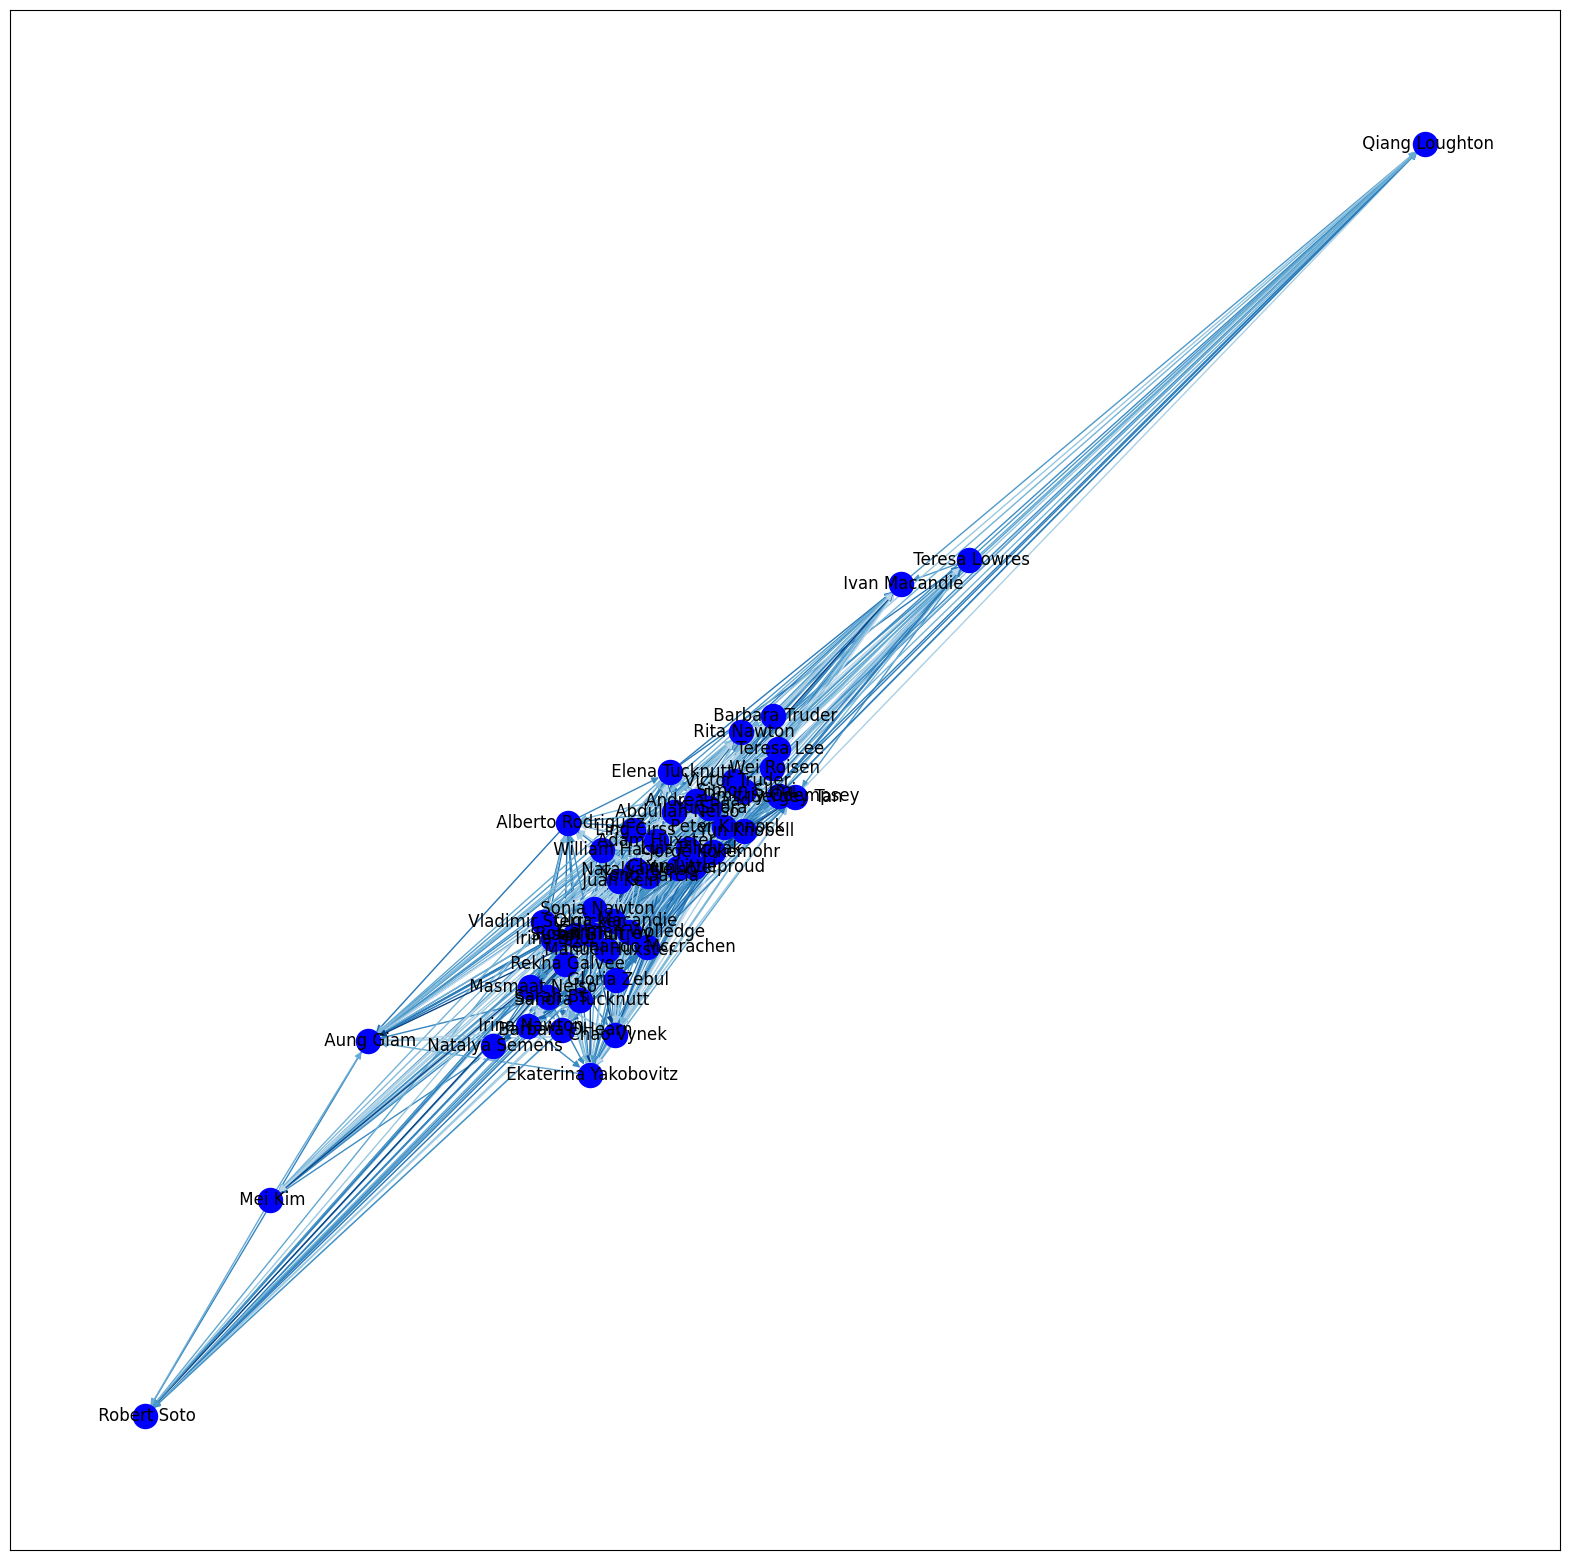

In [6]:
# Normalize ego scores to range [0, 1]
normalized_scores = (network_data['ego_score'] - min(network_data['ego_score'])) / (max(network_data['ego_score']) - min(network_data['ego_score']))

# Use a colormap to map the normalized scores to colors
cmap = plt.cm.Blues

# Create a color list using the colormap
edge_colors = [cmap(score) for score in normalized_scores]

# Use the networkx library to visualize the network
network_graph = nx.from_pandas_edgelist(network_data,
                                         source='ego',
                                         target='alter',
                                         create_using=nx.DiGraph())

plt.figure(figsize=(20, 20))  # Change the default plot size
nx.draw_networkx(network_graph,
                 arrows=True,
                 node_color='b',
                 edge_color=edge_colors,  # Use the edge colors list
                 edge_cmap=cmap)

plt.show()

Create a more insightful visulaisation by:

* Sizing each node according to how often an individual is sought out by others. AKA *Degree Centrality*.
* Focus spesifically on *In-Degree-Centrality*, which is the number of incoming connections.

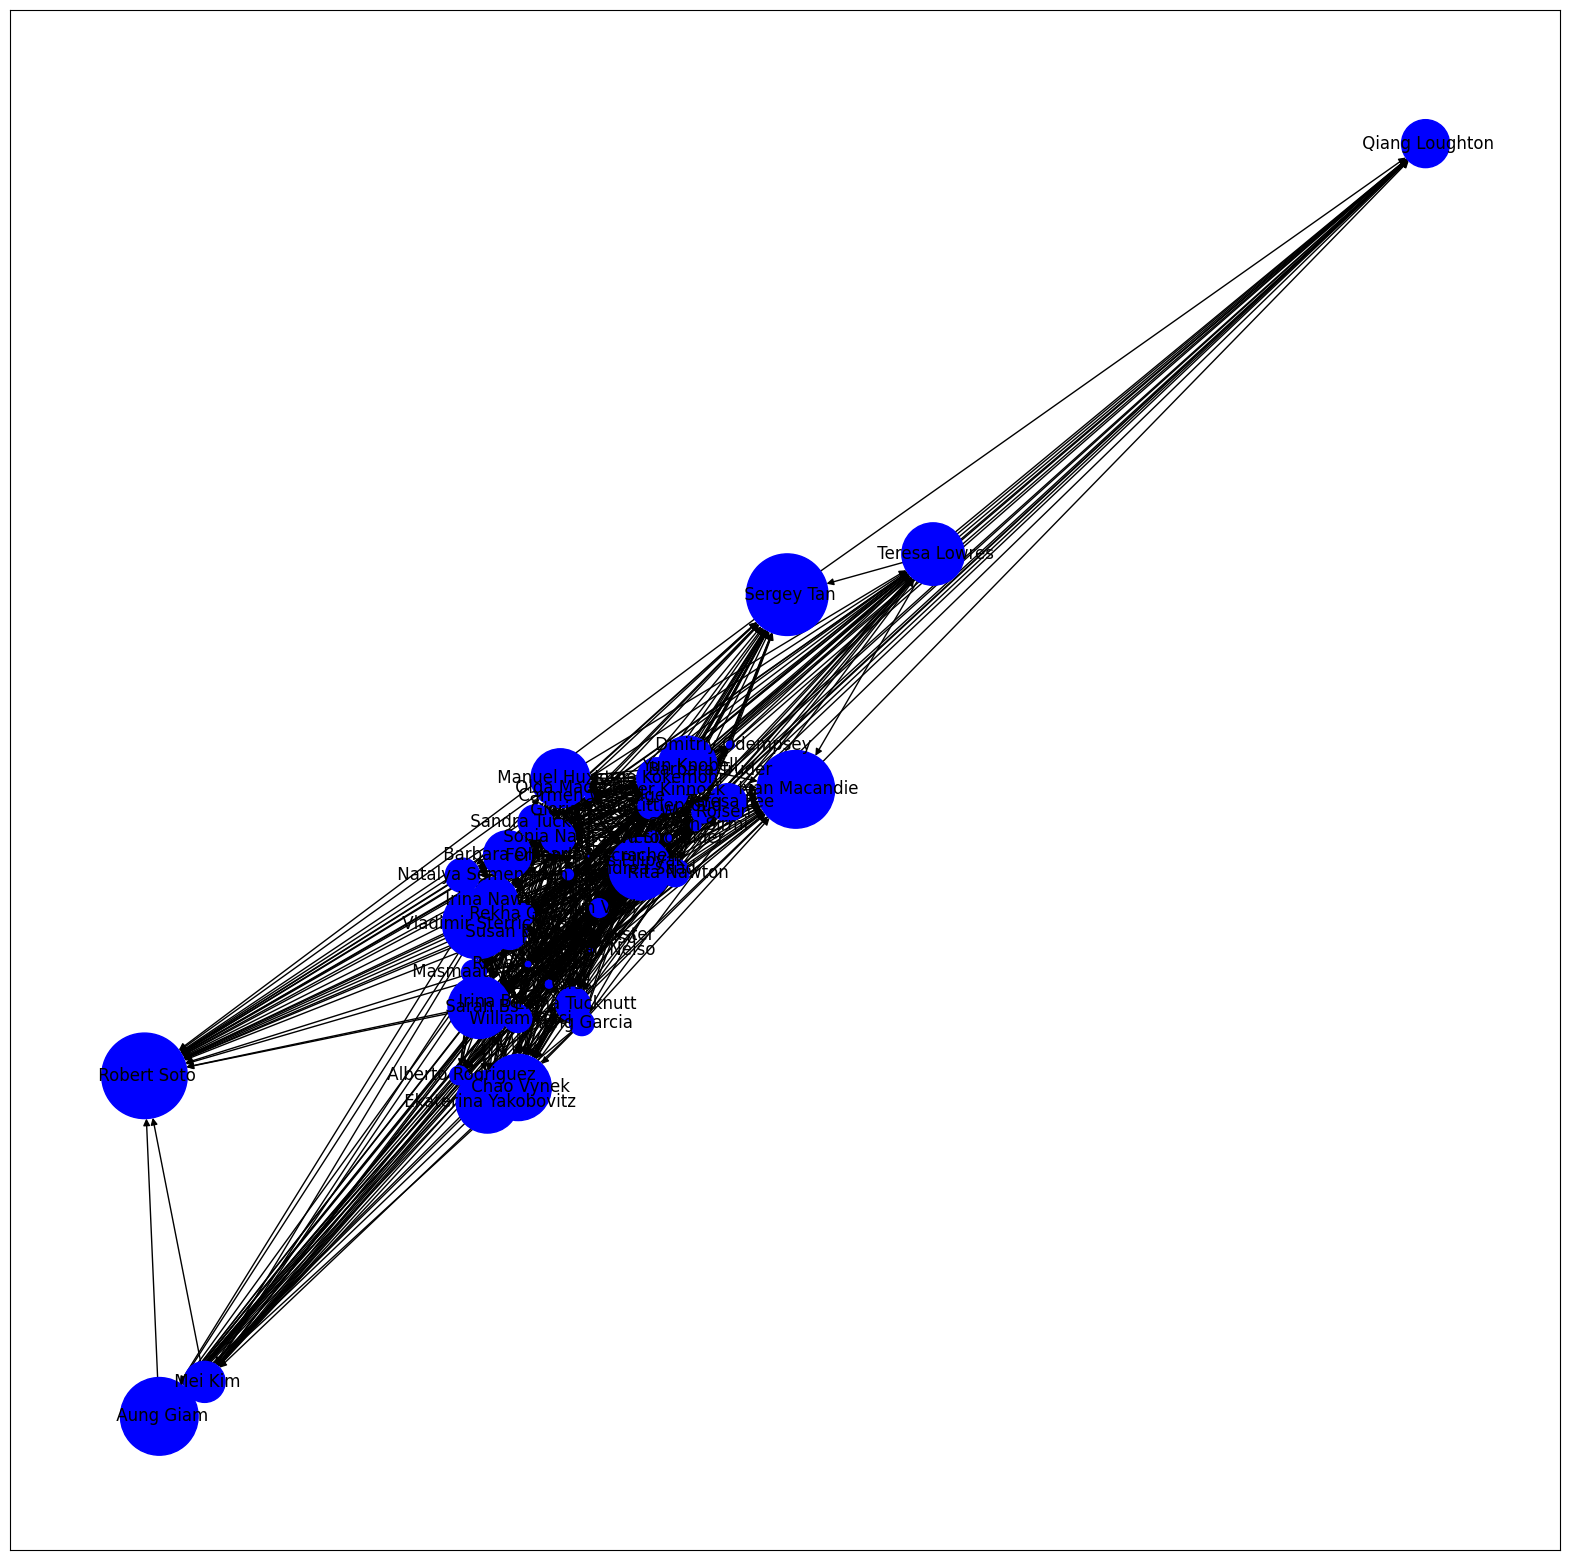

In [7]:
d = dict(network_graph.in_degree()) #This is a new variable that will be use to tell matplotlib how to size nodes

#Re-draw the graph
plt.figure(figsize=(20,20))
nx.draw_networkx(network_graph,
                 arrows=True,
                 node_color='b',
                 node_size= [v**2.5  for v in d.values()]) #This is a list comprehension
                                                           #It states for every value v in our new variable d, raise that value by the power of 4.1

Create a more insigtful visualisation by:
* Adding in department/team data

In [8]:
#Make a *colour key* for netowrkx to work with
#Assign a numeric code for each team which will then be used to assign a colour to each node
hris = names_teams.set_index('Names')
hris = hris.reindex(network_graph.nodes())
hris['Team'] = pd.Categorical(hris['Team'])
hris['Team'].cat.codes

Names
 Abdullah Nelso          5
 Teresa Lowres           3
 Ivan Macandie           7
 Andrea Saad             6
 Irina Nawton            3
 Luis Pilipyak           4
 Alberto Rodriguez       1
 Sonia Nawton            4
 Rekha Galvee            1
 Masmaat Nelso           3
 Dmitriy Odempsey        7
 Chen Littleproud        2
 Yun Vyel                7
 Carmen Wolledge         5
 Yu Shora                1
 Sergey Tan              1
 Aung Giam               6
 Ling Cirss              5
 Barbara OHearn          6
 Yun Knobell             7
 Susan Bhut              1
 Elena Tucknutt          5
 Ekaterina Yakobovitz    7
 Vladimir Sterricker     6
 Mei Kim                 3
 Qiang Loughton          4
 Robert Soto             5
 Manuel Huxster          0
 Sarah Bs                7
 Barbara Truder          4
 Peter Kinnock           1
 William Haci            0
 Jorge Kokemohr          7
 Olga Macandie           4
 Natalya Semens          3
 Rita Nawton             0
 Irina Bhut           

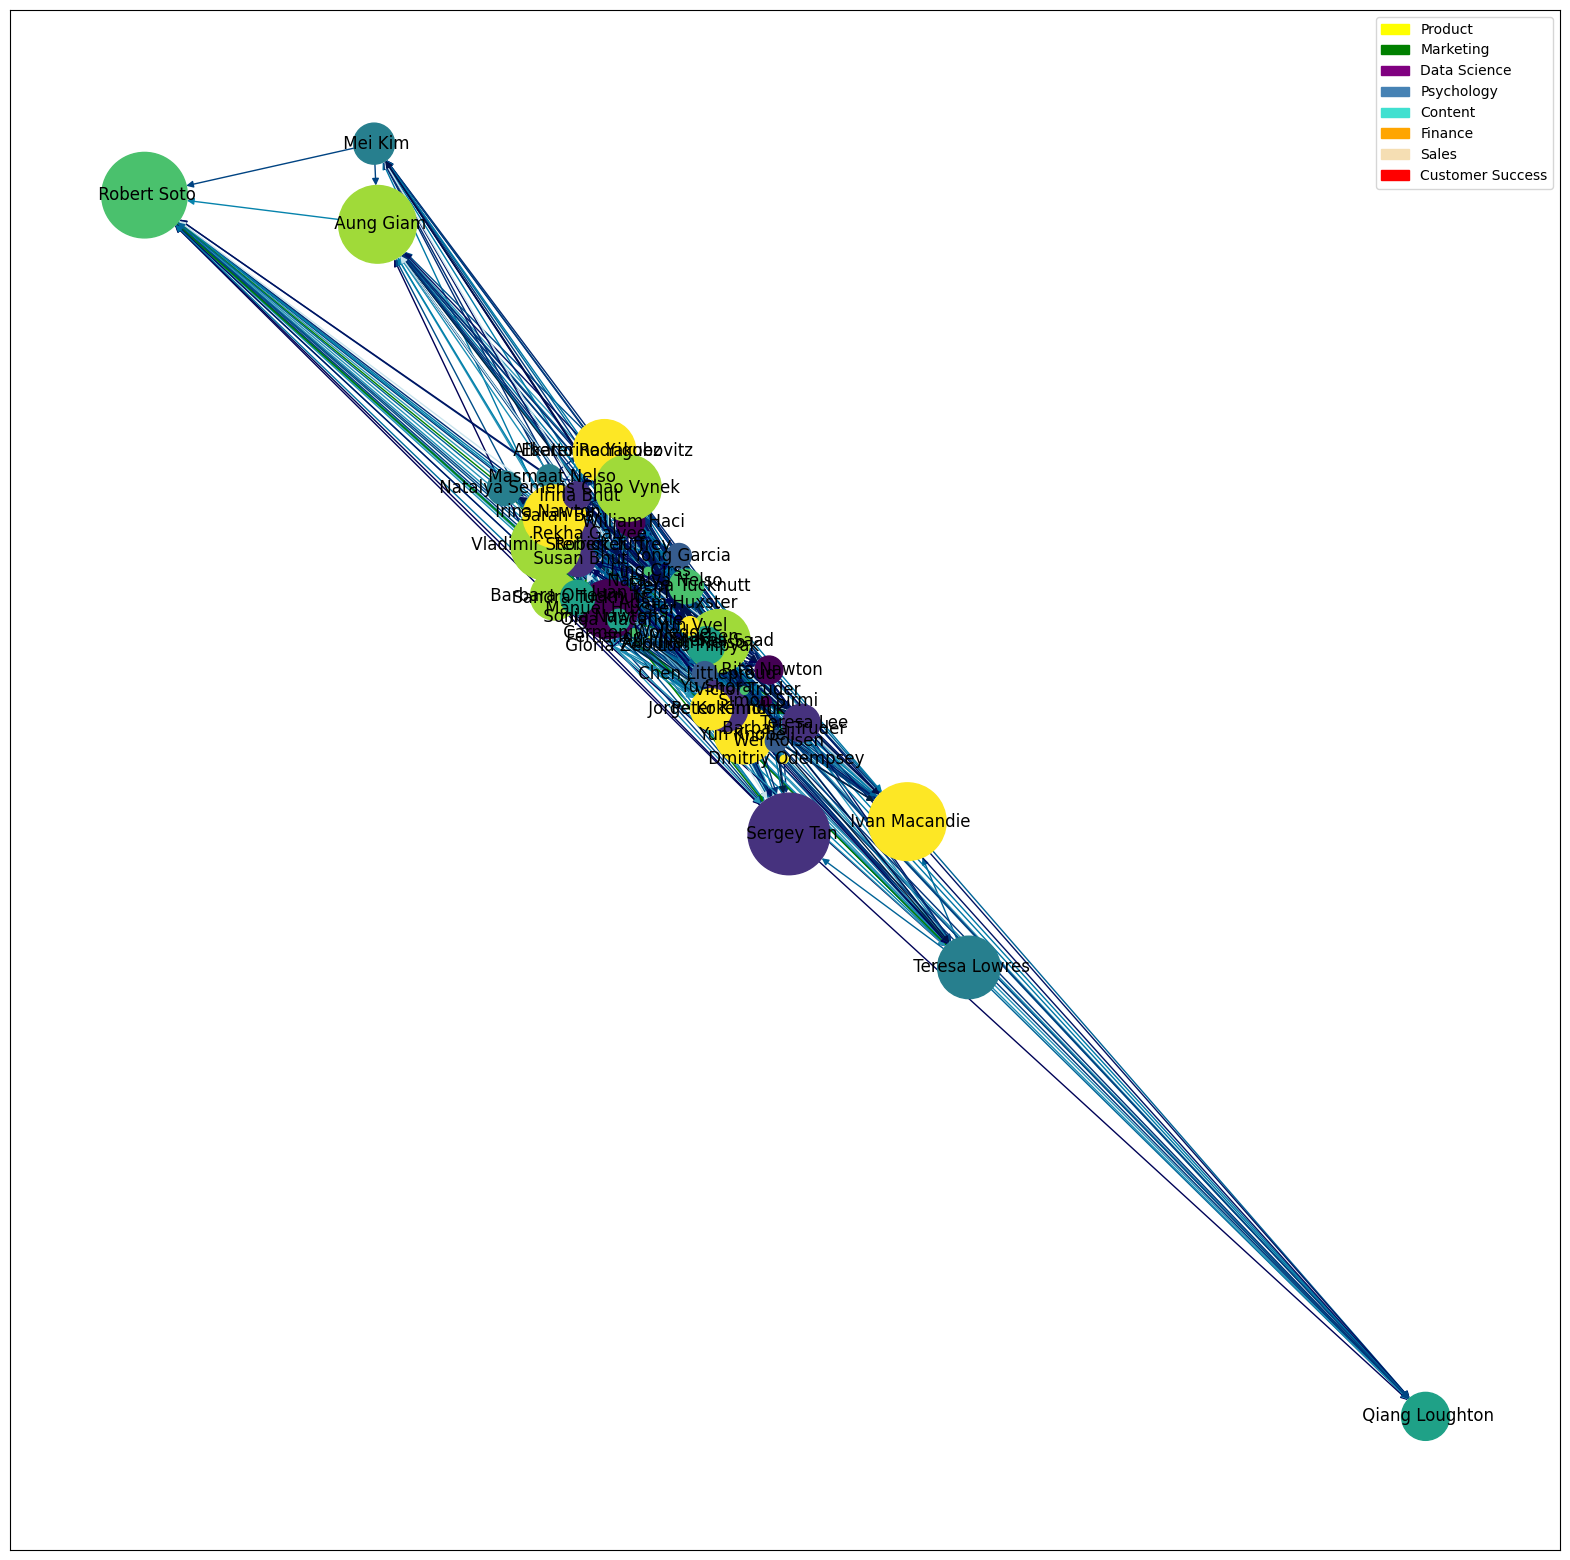

In [9]:
# Normalize ego scores to range [0, 1]
normalized_scores = (network_data['ego_score'] - min(network_data['ego_score'])) / (max(network_data['ego_score']) - min(network_data['ego_score']))

# Use a colormap to map the normalized scores to colors
cmap = plt.cm.ocean

# Create a color list using the colormap
edge_colors = [cmap(score) for score in normalized_scores]

# Use the networkx library to visualize the network
plt.figure(figsize=(20, 20))
nx.draw_networkx(network_graph,
                 arrows=True,
                 node_color=hris['Team'].cat.codes,
                 node_size=[v**2.5 for v in d.values()],
                 edge_color=edge_colors,  # Use the edge colors list
                 edge_cmap=cmap)

# Use Patch and Line2D to create a legend of teams and their colors
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='yellow', edgecolor='yellow', label='Product'),
    Patch(facecolor='green', edgecolor='green', label='Marketing'),
    Patch(facecolor='purple', edgecolor='purple', label='Data Science'),
    Patch(facecolor='steelblue', edgecolor='steelblue', label='Psychology'),
    Patch(facecolor='turquoise', edgecolor='turquoise', label='Content'),
    Patch(facecolor='orange', edgecolor='orange', label='Finance'),
    Patch(facecolor='wheat', edgecolor='wheat', label='Sales'),
    Patch(facecolor='red', edgecolor='red', label='Customer Success')
]

plt.legend(handles=legend_elements, prop={'size': 10})
plt.show()

# Recommendation Analysis

Dig deeper into the analysis by applying a few more transformation and calculations to gain insightful information and make commuincation recomendations

### Inbound Connections

Used as a measure of influence 

Gain insight to see how many people seek out an individual employee

In [10]:
#Use Pandas to count the number of times someone is connected to another
##Ego
ego_inbound_connections=pd.DataFrame(network_data.groupby('ego').size()) #Groupby will combine rows with the same Name (participant), and size counts them

ego_inbound_connections.reset_index(inplace=True)
ego_inbound_connections.columns=['ego','Inbound Connections'] #Rename the count to something more intuitive 
ego_inbound_connections.sort_values('Inbound Connections',ascending=False,inplace=True) #Sort to see who is most influential on top

##Alter
alter_inbound_connections=pd.DataFrame(network_data.groupby('alter').size()) #Groupby will combine rows with the same Name (participant), and size counts them

alter_inbound_connections.reset_index(inplace=True)
alter_inbound_connections.columns=['alter','Inbound Connections'] #Rename the count to something more intuitive 
alter_inbound_connections.sort_values('Inbound Connections',ascending=False,inplace=True) #Sort to see who is most influential on top

### Cross-Team Collaboration

View cross-team collaboration using a *block density chart*. 

This represents the number of connections to other groups as a percentage of all a group's outgoing connections

In [11]:
#Use the crosstab method to create a frequency table
cross_team = pd.crosstab(index=network_data['ego_team'],
                         columns=network_data['alter_team'],
                         normalize='index').round(4)*100

display(cross_team)

##Flatten cross_team
cross_team_filtered = cross_team.stack().reset_index()
cross_team_filtered.columns = ['ego_team','alter_team','collaboration']
##Only include cross team collaboration > 30
#cross_team_filtered = cross_team_filtered[cross_team_filtered['collaboration'] > 30]
display(cross_team_filtered)

alter_team,Content,Customer Success,Data Science,Finance,Marketing,Product,Psychology,Sales
ego_team,,,,,,,,
Content,7.25,18.84,7.25,11.59,13.04,4.35,17.39,20.29
Customer Success,7.34,13.76,5.50,13.76,13.76,10.09,15.60,20.18
Data Science,7.69,15.38,4.62,13.85,15.38,7.69,13.85,21.54
Finance,11.63,20.93,3.49,12.79,8.14,10.47,13.95,18.60
Marketing,7.25,18.84,2.90,13.04,10.14,11.59,21.74,14.49
Product,11.83,18.28,5.38,11.83,9.68,5.38,18.28,19.35
Psychology,4.35,13.04,6.52,15.22,8.70,19.57,17.39,15.22
Sales,8.45,15.49,2.82,11.27,11.27,5.63,26.76,18.31


,ego_team,alter_team,collaboration
0,Content,Content,7.25
1,Content,Customer Success,18.84
2,Content,Data Science,7.25
3,Content,Finance,11.59
4,Content,Marketing,13.04
...,...,...,...
59,Sales,Finance,11.27
60,Sales,Marketing,11.27
61,Sales,Product,5.63
62,Sales,Psychology,26.76


### Communication Reccomendation

Reccommending who I should be talking to based off:
 * Someone who my team collaborates often with.
 * Someone who colloborates often with my team.
 * Someone who has similar behaviour and personality scores to me.
 * Someone who has similar influence (inbound connections) to me.

In [12]:
#Intantiate a new data frame
communications = pd.DataFrame(network_data)

#Difference between ego_score an alter_score
communications['score_difference'] = (communications['ego_score'] - communications['alter_score'])


#Binary Value for Cross Team Collaboration
#Merge
communications = pd.merge(communications,cross_team_filtered,on='ego_team', how='outer')
communications = communications[communications['alter_team_x'] == communications['alter_team_y']]
#Add binary
communications.loc[communications['collaboration'] > 30, 'CTC'] = 1
communications.loc[communications['ego_team'] == communications['alter_team_x'], 'CTC'] = 1
communications.loc[communications['collaboration'] < 30, 'CTC'] = 0


#Influence/Inbound Connections of ego and alter
communications = pd.merge(communications,ego_inbound_connections,on='ego')
communications = pd.merge(communications,alter_inbound_connections,on='alter')


#Clean Up
communications = communications.drop('alter_team_y', axis=1)
communications.columns = ['ego','alter','ego_score','alter_score','ego_team','alter_team','score_difference','collaboration','CTC','ego_influence','alter_influence']
communications = communications.reindex(columns=['ego','alter','ego_score','alter_score','ego_team','alter_team','score_difference','ego_influence','alter_influence','collaboration','CTC'])

#Total score of reccomended communications based off; alter_influenece, score-difference, and collaboration/CTC
communications['total_score'] = (communications['alter_score'] + communications['score_difference'] + communications['collaboration'])

#Should ego talk to alter Y/N
mean_ts = mean(communications['total_score'])

communications.loc[communications['total_score'] >= mean_ts, 'recommend'] = 'Yes'
communications.loc[communications['total_score'] < mean_ts, 'recommend'] = 'No'

display(communications)

,ego,alter,ego_score,alter_score,ego_team,alter_team,score_difference,ego_influence,alter_influence,collaboration,CTC,total_score,recommend
0,Juan Keirl,Rita Nawton,0.717814,1.478450,Content,Content,-0.760636,19,11,7.25,0.0,7.967814,No
1,Juan Keirl,Susan Bhut,0.717814,3.871629,Content,Customer Success,-3.153816,19,13,18.84,0.0,19.557814,Yes
2,Juan Keirl,Alberto Rodriguez,0.717814,2.488800,Content,Customer Success,-1.770987,19,8,18.84,0.0,19.557814,Yes
3,Juan Keirl,Teresa Lowres,0.717814,0.034335,Content,Finance,0.683479,19,21,11.59,0.0,12.307814,No
4,Juan Keirl,Yong Garcia,0.717814,3.334126,Content,Data Science,-2.616312,19,10,7.25,0.0,7.967814,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Yun Vyel,Manuel Huxster,0.878526,1.943143,Sales,Content,-1.064616,20,20,8.45,0.0,9.328526,No
604,Yun Vyel,Teresa Lowres,0.878526,0.034335,Sales,Finance,0.844191,20,21,11.27,0.0,12.148526,No
605,Yun Vyel,Sarah Bs,0.878526,1.947825,Sales,Sales,-1.069299,20,21,18.31,0.0,19.188526,Yes
606,Yun Vyel,Yun Knobell,0.878526,2.501834,Sales,Sales,-1.623308,20,20,18.31,0.0,19.188526,Yes


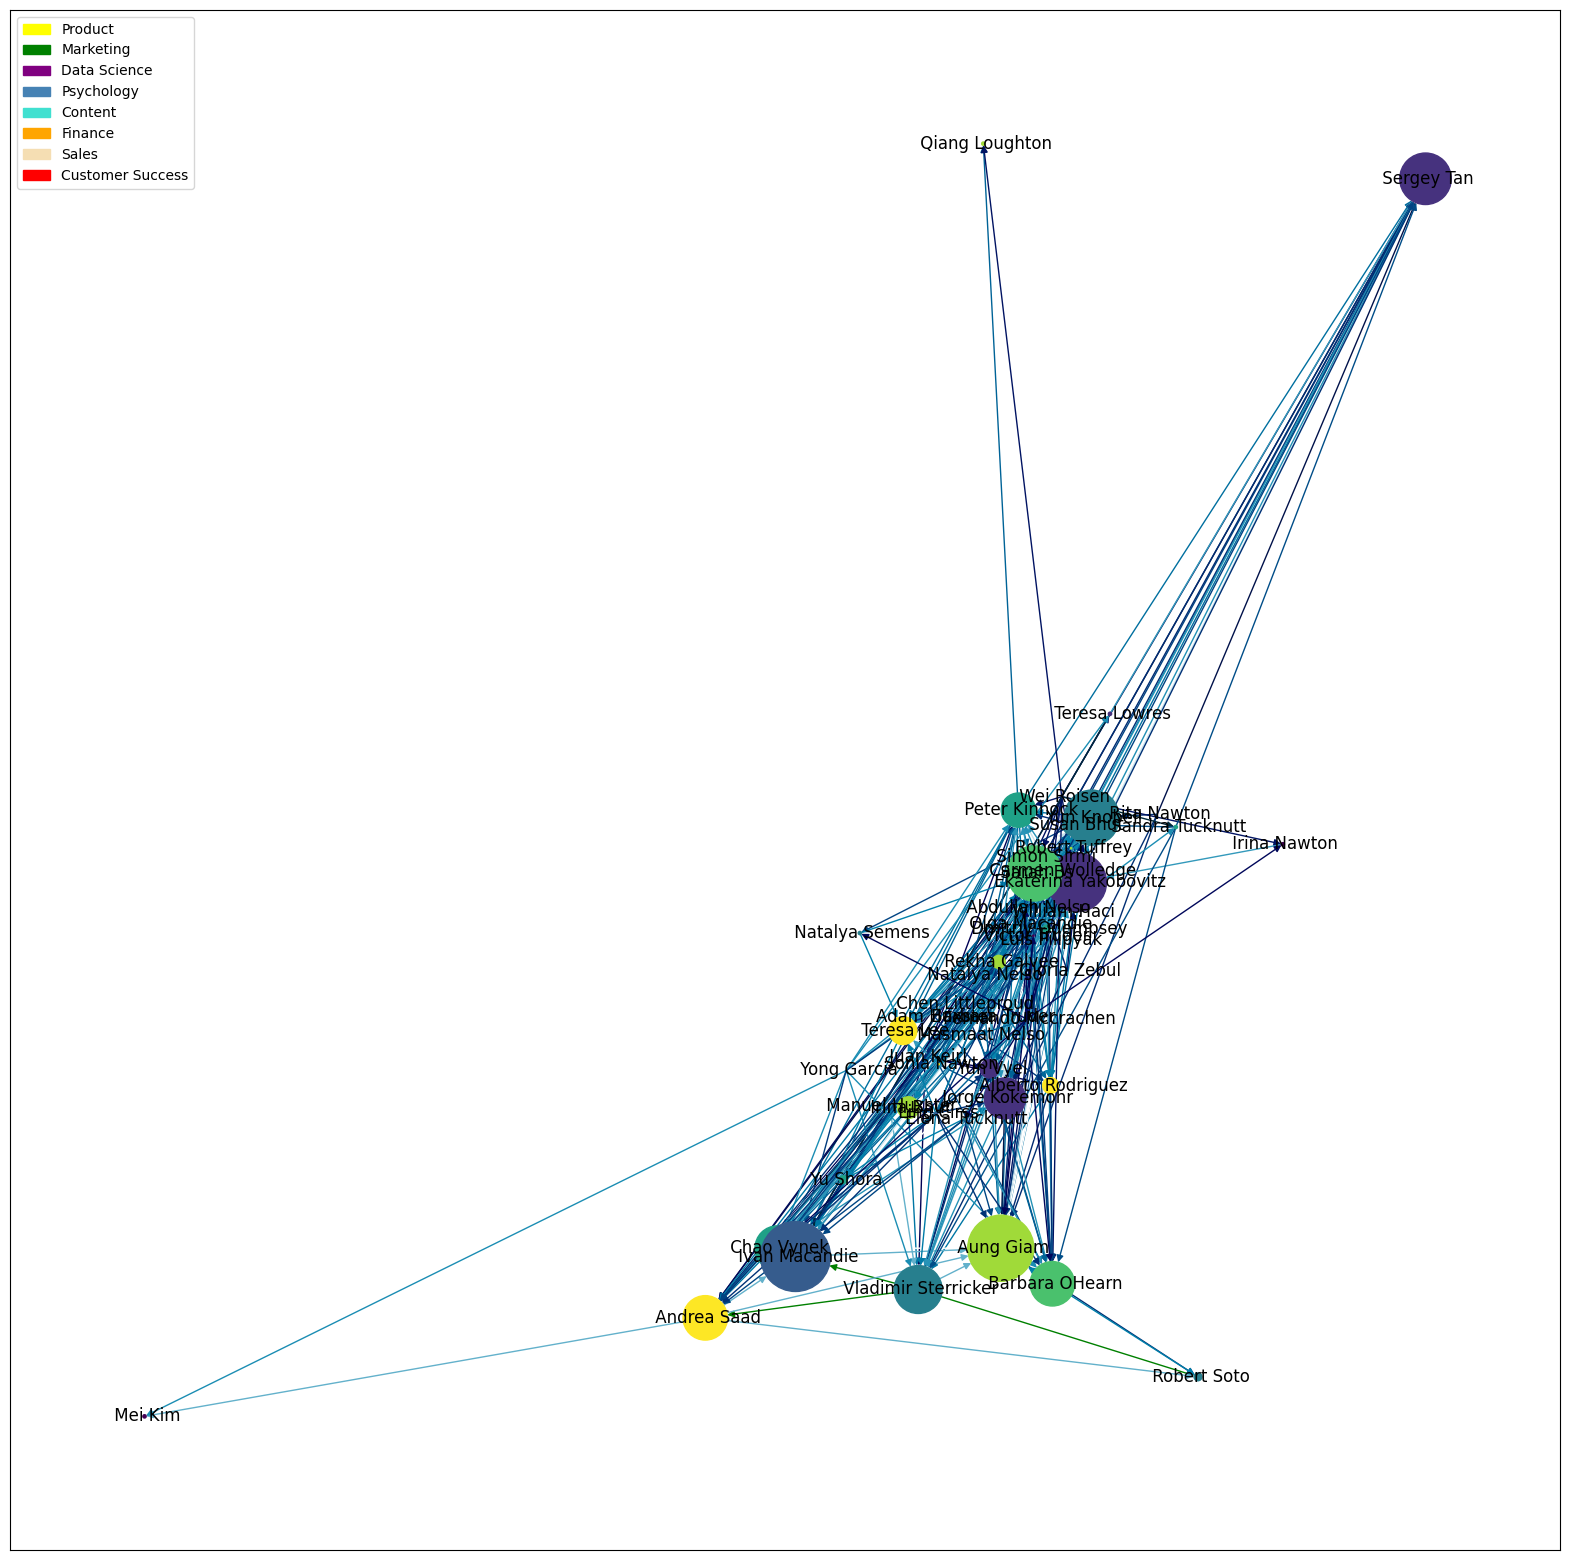

In [13]:
##Intantiate a new data frame
recommend_network_data = pd.DataFrame(communications)

##Filter for only recommended communications
recommend_network_data = recommend_network_data[recommend_network_data['recommend'] == 'Yes']

##Clean up to create an edge list
recommend_network_data = recommend_network_data.drop(['score_difference','ego_influence','alter_influence','collaboration','CTC','total_score','recommend'], axis=1)

#Use the networkx library to visualise the network
recommend_network_graph=nx.from_pandas_edgelist(recommend_network_data,              #This tells networkx that the dataframe can be read as a list of connections
                                      source='ego', 
                                      target='alter',
                                      create_using=nx.DiGraph()) #This tells networkx that connections can go both ways (people can both seek and be sought)
                                                                 
d = dict(recommend_network_graph.in_degree()) #This is a new variable that will be use to tell matplotlib how to size nodes


# Normalize ego scores to range [0, 1]
normalized_scores = (recommend_network_data['ego_score'] - min(recommend_network_data['ego_score'])) / (max(recommend_network_data['ego_score']) - min(recommend_network_data['ego_score']))

# Use a colormap to map the normalized scores to colors
cmap = plt.cm.ocean

# Create a color list using the colormap
edge_colors = [cmap(score) for score in normalized_scores]

# Use the networkx library to visualize the network
plt.figure(figsize=(20, 20))
nx.draw_networkx(recommend_network_graph,
                 arrows=True,
                 node_color=hris['Team'].cat.codes,
                 node_size=[v**2.5 for v in d.values()],
                 edge_color=edge_colors,  # Use the edge colors list
                 edge_cmap=cmap)

# Use Patch and Line2D to create a legend of teams and their colors
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='yellow', edgecolor='yellow', label='Product'),
    Patch(facecolor='green', edgecolor='green', label='Marketing'),
    Patch(facecolor='purple', edgecolor='purple', label='Data Science'),
    Patch(facecolor='steelblue', edgecolor='steelblue', label='Psychology'),
    Patch(facecolor='turquoise', edgecolor='turquoise', label='Content'),
    Patch(facecolor='orange', edgecolor='orange', label='Finance'),
    Patch(facecolor='wheat', edgecolor='wheat', label='Sales'),
    Patch(facecolor='red', edgecolor='red', label='Customer Success')
]

plt.legend(handles=legend_elements, prop={'size': 10})
plt.show()
#display(recommend_network_data)